In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rm
import numpy as np

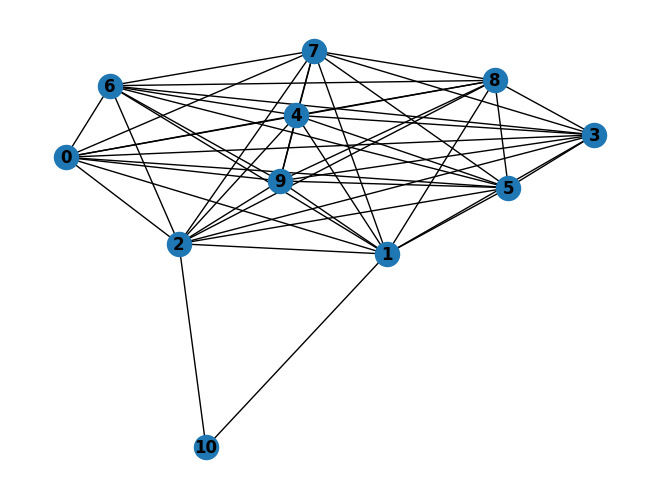

In [2]:
G = nx.Graph()

# nodes = [i for i in range(6)]
# edges = [(1, 2), (1, 3), (1, 4), (2, 4), (3, 5), (5, 5)]

G = nx.complete_graph(10)

G.add_nodes_from([10])
G.add_edges_from([(2,10),(1,10)])

for i in range(4):
    for j in range(i+1, 4):
        G.edges[i, j]["color"] = "red"
        

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [7]:
def str2int_arr(str):
    return [float(i) for i in str]

def graph_from_file(file):
    w = []
    with open(file, "r") as f:
        for line in f:
            arr = line.split()
            map(int, arr)
            w.append(str2int_arr(arr))
    return nx.from_numpy_matrix(np.array(w))

def graph_from_dimacs(file):
    G = nx.Graph()
    with open(file, "r") as f:
        for line in f:
            buff = line.split()
            if buff[0]=="p":
                G.add_nodes_from([i for i in range(1, int(buff[2])+1 )])
                break
        for line in f:
            edge = line.split()
            G.add_edge(int(edge[1]), int(edge[2]))
    return G

def digits_from_01(arr):
    digits = []
    for i in range(len(arr)):
        if int(arr[i]) == 1:
            digits.append(i) 
    return digits
    

def initial_population(n, size):
    population = []
    for _ in range(size):
        individual = ""
        for _ in range(n):
            individual += rm.choice("0")
        population.append(individual)
    return population
    
def adaptability(G, individual, fine=4):
    subgraph_v = []
    for i in range(len(individual)):
        if individual[i]=="1":
            subgraph_v.append(i)
    subgraph = nx.subgraph(G, subgraph_v)
    n = len(subgraph_v)
    return max(n-(n*(n-1)//2 - subgraph.number_of_edges())*fine, 1)

def roulette(population, k):
    
    population_weights = [adaptability(G, i) for i in population]
    #if sum(population_weights)==0 :
    #    population_weights = [1 for _ in range(len(population_weights))]
    descendants = rm.choices(population, population_weights, k=k)
    
    return descendants

def crossover(parents):
    parent1, parent2 = parents
    point = rm.randint(0, len(parent1)-1)
    child = parent1[:point] + parent2[point:]
    return child 

def mutation(individual, probability = 0.5):# сделать шанс
    
    point = rm.randint(0, len(individual)-1)
    out = list(individual)
    if out[point] == "1":
        out[point] = "0"
    else:
        out[point] = "1"
    return "".join(out)


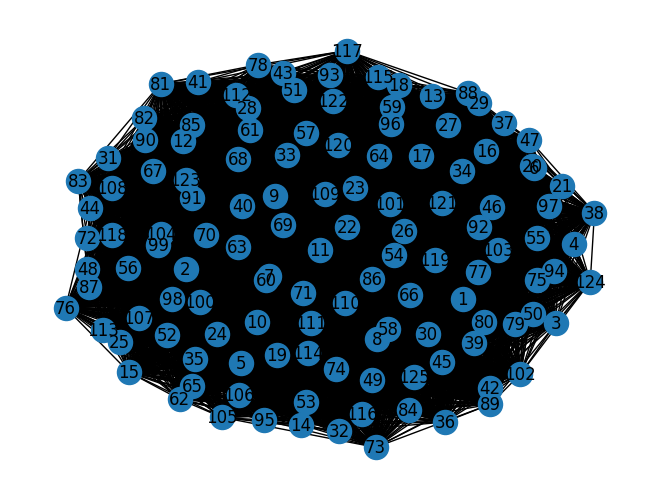

In [4]:
#G = graph_from_file("graph_examples/16_9")
G = graph_from_dimacs("DIMACS_subset_ascii/C125.9.clq")
nx.draw(G, with_labels=True)

In [9]:
n = G.number_of_nodes()-1
p_size = 5
np_size = 5

population = initial_population(n, p_size)
p_adaptability = [adaptability(G, ind) for ind in population]
p_adaptability, population = (list(t) for t in zip(*sorted(zip(p_adaptability, population), reverse=True)))
iter = 0

while(p_adaptability[0] < 25 and iter < 1000): # add size of clique 
    
    # выбор родителей + скрещивание + мутация
    for i in range(np_size):
        population.append(mutation( crossover( roulette(population, 2) ) )) #  ???
        
    # сортировка по приспособленности  
    p_adaptability = [adaptability(G, ind) for ind in population]
    p_adaptability, pop_sort = (list(t) for t in zip(*sorted(zip(p_adaptability, population), reverse=True)))

    # выбор новой популяции
    population = rm.choices(pop_sort, p_adaptability, k=p_size)
    
    iter += 1
    
print(p_adaptability)
print(pop_sort)
print(digits_from_01(pop_sort[0]))
print(iter)


[19, 18, 18, 18, 17, 16, 13, 8, 7, 7]
['0000001101010100001000010000000001110000000100000100000000001000000000000000000000000000000000000001010000000011000001000001', '0000001101010100001000010000000001110000000100000100000000000000000000000000000000000000000000000001010000000011000001000001', '0000001101010100001000010000000001110000000100000100000000000000000000000000000000000000000000000001010000000011000001000001', '0000001101010100001000010000000001110000000100000100000000000000000000000000000000000000000000000001000000000011000001000011', '0000001101010100001000010000000001110000000100000100000000001000000010000001000000000000000000000001010000000011000001000001', '0000001101010100001000010000000001110000000100000100000000001000000000000001000000000000000000000001010000000011000001000001', '0000001101010100001000010000000001110000000100010100000000001000000000000001000000000000000000000001010000000011000001000001', '0000001101010100001000010000000001110000000100000100000000001000